In [1]:
import csv
import re
import matplotlib
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style, colors
import matplotlib.patches as patches
from matplotlib import gridspec


matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 6)


In [2]:
f1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/mutations_for_oncoprint_124_patients.txt'
df = pd.read_csv(f1, index_col='percentage')
df.head(3)

,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02424,HTMCP-03-06-02427,HTMCP-03-06-02428,HTMCP-03-06-02434,HTMCP-03-06-02435,HTMCP-03-06-02437,HTMCP-03-06-02441,HTMCP-03-06-02442,HTMCP-03-06-02447,HTMCP-03-06-02448
percentage,,,,,,,,,,,,,,,,,,,,,
HIV_Status,Positive,Negative,Positive,Negative,Negative,Negative,Negative,Negative,Positive,Negative,...,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive
Puatative_Histology,Squamous,Squamous,Squamous,Squamous,Adeno,Squamous,Squamous,Squamous,Squamous,Adeno,...,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,Adeno,Squamous,Squamous,Adeno
PIK3CA(36%),NON_SYNONYMOUS_CODING,NON_SYNONYMOUS_CODING,NaN,NaN,Multiple,NaN,NON_SYNONYMOUS_CODING,NON_SYNONYMOUS_CODING,NaN,STOP_GAINED,...,NaN,NaN,NON_SYNONYMOUS_CODING,NaN,NaN,NaN,NaN,NaN,NON_SYNONYMOUS_CODING,NaN


In [3]:
clrs = ['white', "purple", "#E69F00","#009E73","#56B4E9","#377EB8","#E41A1C","#F0E442",'black',"#D55E00","#CC79A7"]

In [4]:
df = df.sort_values(df.index.tolist(), axis=1, ascending=False).fillna(0)
df.head()

,HTMCP-03-06-02262,HTMCP-03-06-02170,HTMCP-03-06-02001,HTMCP-03-06-02070,HTMCP-03-06-02260,HTMCP-03-06-02240,HTMCP-03-06-02344,HTMCP-03-06-02428,HTMCP-03-06-02411,HTMCP-03-06-02447,...,HTMCP-03-06-02075,HTMCP-03-06-02203,HTMCP-03-06-02047,HTMCP-03-06-02007,HTMCP-03-06-02157,HTMCP-03-06-02326,HTMCP-03-06-02085,HTMCP-03-06-02182,HTMCP-03-06-02150,HTMCP-03-06-02061
percentage,,,,,,,,,,,,,,,,,,,,,
HIV_Status,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,...,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,0
Puatative_Histology,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,...,Adeno,Adeno,Adeno,Adeno,Adeno,Adeno,Adeno,Adeno,Adeno,0
PIK3CA(36%),NON_SYNONYMOUS_CODING,NON_SYNONYMOUS_CODING,NON_SYNONYMOUS_CODING,NON_SYNONYMOUS_CODING,NON_SYNONYMOUS_CODING,NON_SYNONYMOUS_CODING,NON_SYNONYMOUS_CODING,NON_SYNONYMOUS_CODING,NON_SYNONYMOUS_CODING,NON_SYNONYMOUS_CODING,...,NON_SYNONYMOUS_CODING,NON_SYNONYMOUS_CODING,NON_SYNONYMOUS_CODING,Multiple,0,0,0,0,0,NON_SYNONYMOUS_CODING
HLA-B(20%),STOP_GAINED,NON_SYNONYMOUS_CODING,NON_SYNONYMOUS_CODING,NON_SYNONYMOUS_CODING,Multiple,0,0,0,0,0,...,NON_SYNONYMOUS_CODING,0,0,NON_SYNONYMOUS_CODING,NON_SYNONYMOUS_CODING,0,0,0,0,0
MAGEC1(18%),0,NON_SYNONYMOUS_CODING,0,0,NON_SYNONYMOUS_CODING,SPLICE_ACCEPTOR_DONOR,NON_SYNONYMOUS_CODING,0,0,0,...,0,NON_SYNONYMOUS_CODING,0,NON_SYNONYMOUS_CODING,0,NON_SYNONYMOUS_CODING,0,0,0,0


In [5]:
assert len(pd.Series(df.values.ravel()).unique()) == len(clrs)

In [6]:
# s = {k: d[k] for k in sorted(d, key=d.get, reverse=False)}
map_dict1 = {0: 0.05,
 'Adeno': 0.15,
 'Squamous': 0.25,
 'Negative': 0.35,
 'Positive': 0.45,
 'NON_SYNONYMOUS_CODING': 0.55,
 'CODON_DELETION': 0.65,
 'Multiple': 0.75,
 'FRAME_SHIFT': 0.85,
 'SPLICE_ACCEPTOR_DONOR': 0.95,
 'STOP_GAINED': 1.05}

In [7]:
map_dict2 = {}
for n, k in enumerate(map_dict1.keys()):
    map_dict2[k] = clrs[n]
map_dict2

{0: 'white',
 'Adeno': 'purple',
 'Squamous': '#E69F00',
 'Negative': '#009E73',
 'Positive': '#56B4E9',
 'NON_SYNONYMOUS_CODING': '#377EB8',
 'CODON_DELETION': '#E41A1C',
 'Multiple': '#F0E442',
 'FRAME_SHIFT': 'black',
 'SPLICE_ACCEPTOR_DONOR': '#D55E00',
 'STOP_GAINED': '#CC79A7'}

In [8]:
assert list(map_dict2.values()) == clrs

In [9]:
ndf = df.apply(lambda x: x.map(map_dict1)).fillna(0)
ndf.head(4)

,HTMCP-03-06-02262,HTMCP-03-06-02170,HTMCP-03-06-02001,HTMCP-03-06-02070,HTMCP-03-06-02260,HTMCP-03-06-02240,HTMCP-03-06-02344,HTMCP-03-06-02428,HTMCP-03-06-02411,HTMCP-03-06-02447,...,HTMCP-03-06-02075,HTMCP-03-06-02203,HTMCP-03-06-02047,HTMCP-03-06-02007,HTMCP-03-06-02157,HTMCP-03-06-02326,HTMCP-03-06-02085,HTMCP-03-06-02182,HTMCP-03-06-02150,HTMCP-03-06-02061
percentage,,,,,,,,,,,,,,,,,,,,,
HIV_Status,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,...,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.05
Puatative_Histology,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,...,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.05
PIK3CA(36%),0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,...,0.55,0.55,0.55,0.75,0.05,0.05,0.05,0.05,0.05,0.55
HLA-B(20%),1.05,0.55,0.55,0.55,0.75,0.05,0.05,0.05,0.05,0.05,...,0.55,0.05,0.05,0.55,0.55,0.05,0.05,0.05,0.05,0.05


In [10]:
odf = df.apply(lambda x: x.map(map_dict2))
odf.head()

,HTMCP-03-06-02262,HTMCP-03-06-02170,HTMCP-03-06-02001,HTMCP-03-06-02070,HTMCP-03-06-02260,HTMCP-03-06-02240,HTMCP-03-06-02344,HTMCP-03-06-02428,HTMCP-03-06-02411,HTMCP-03-06-02447,...,HTMCP-03-06-02075,HTMCP-03-06-02203,HTMCP-03-06-02047,HTMCP-03-06-02007,HTMCP-03-06-02157,HTMCP-03-06-02326,HTMCP-03-06-02085,HTMCP-03-06-02182,HTMCP-03-06-02150,HTMCP-03-06-02061
percentage,,,,,,,,,,,,,,,,,,,,,
HIV_Status,#56B4E9,#56B4E9,#56B4E9,#56B4E9,#56B4E9,#56B4E9,#56B4E9,#56B4E9,#56B4E9,#56B4E9,...,#009E73,#009E73,#009E73,#009E73,#009E73,#009E73,#009E73,#009E73,#009E73,white
Puatative_Histology,#E69F00,#E69F00,#E69F00,#E69F00,#E69F00,#E69F00,#E69F00,#E69F00,#E69F00,#E69F00,...,purple,purple,purple,purple,purple,purple,purple,purple,purple,white
PIK3CA(36%),#377EB8,#377EB8,#377EB8,#377EB8,#377EB8,#377EB8,#377EB8,#377EB8,#377EB8,#377EB8,...,#377EB8,#377EB8,#377EB8,#F0E442,white,white,white,white,white,#377EB8
HLA-B(20%),#CC79A7,#377EB8,#377EB8,#377EB8,#F0E442,white,white,white,white,white,...,#377EB8,white,white,#377EB8,#377EB8,white,white,white,white,white
MAGEC1(18%),white,#377EB8,white,white,#377EB8,#D55E00,#377EB8,white,white,white,...,white,#377EB8,white,#377EB8,white,#377EB8,white,white,white,white


In [11]:
# get gene list
f2 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/genes.txt'
df2 = pd.read_csv(f2)
df2.head(2)
genes = df2.genes.tolist()

In [12]:
legends = sorted(map_dict1, key=map_dict1.get, reverse=False)

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


CPU times: user 7.56 s, sys: 288 ms, total: 7.85 s
Wall time: 7.87 s


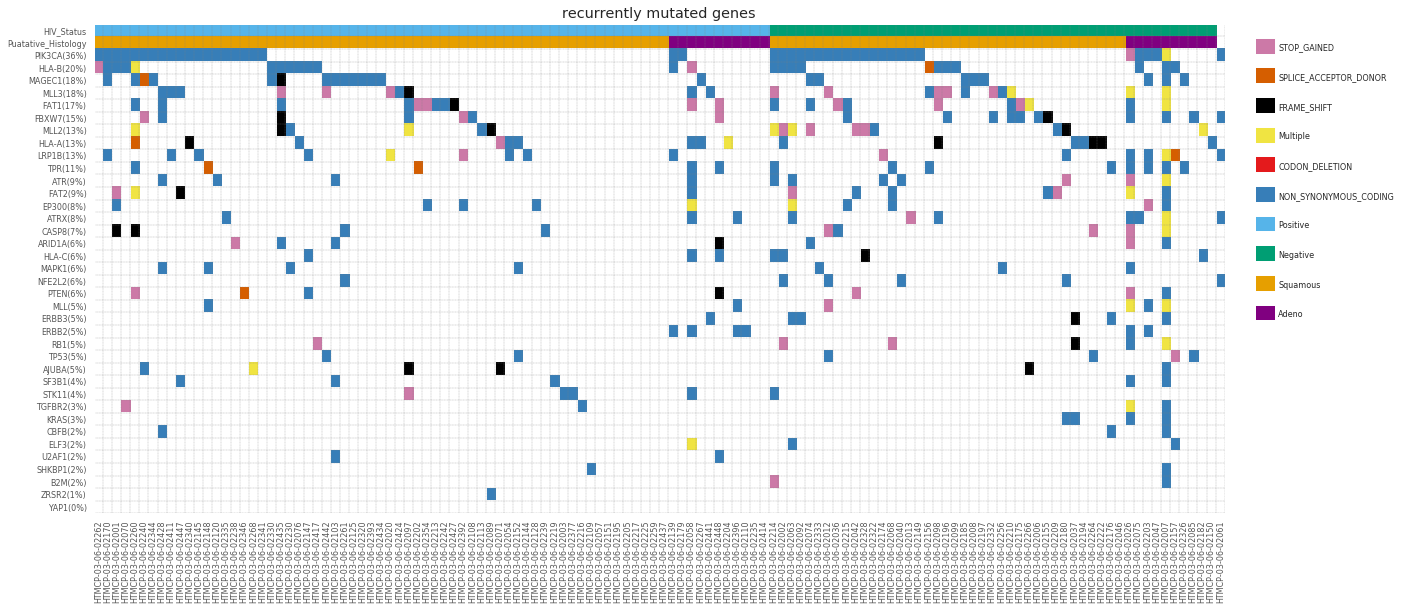

In [13]:
df = ndf.copy()
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# fig = plt.figure(figsize=(22, 9))
fig = plt.figure(figsize=(22, 9), facecolor='white')

gs = gridspec.GridSpec(1, 2, height_ratios=[1], width_ratios=[17,1], 
                       wspace=0.05, # horizontal space
                       hspace=0.0  # vertical space
                      )

# clrs = ['white', "purple", "#E69F00","#009E73","#56B4E9","#377EB8","#E41A1C","#F0E442",'black',"#D55E00","#CC79A7"]
# clrs = ['white',  'orange', 'purple','green',  'navy', 'red','blue', 'magenta' ]#"#0072B2",
bounds = np.arange(0, 1.2, 0.1).tolist()

# make a color map of fixed colors
cmap = colors.ListedColormap(clrs)
norm = colors.BoundaryNorm(bounds, cmap.N)
nrow = len(df.index)
ncol = len(df.columns)

ax1 = fig.add_subplot(gs[0])
img = ax1.imshow(df.values, interpolation='none', origin='upper', aspect='auto',
                    cmap=cmap, norm=norm)

_ = plt.yticks(np.arange(0, nrow, 1), df.index, fontsize=8)
_ = plt.xticks(np.arange(0, ncol, 1), df.columns, fontsize=8, rotation=90)

_ = ax1.set_yticks(np.arange(-.5, nrow, 1), minor=True);
_ = ax1.set_xticks(np.arange(-.5, ncol, 1), minor=True);

# Gridlines based on minor ticks
_ = ax1.grid(b=True, which='minor', color='gray', linestyle='--', linewidth=0.3)
# hide major tick grid
_ = ax1.grid(b=True, which='major', color='r', linestyle='-', linewidth=0)

ax1.spines['right'].set_visible(True)
ax1.spines['top'].set_visible(True)
ax1.set_title('recurrently mutated genes')

# add legend
gs01 = gridspec.GridSpecFromSubplotSpec(2, 1,  height_ratios=[2, 1], subplot_spec=gs[1])
ax2_1 = fig.add_subplot(gs01[0], facecolor='white')
ax2_1.set_title("mutations")


# plot mutation legend
k = -1
for key in map_dict2:
    if key !=0: # don't plot key=0 which means no mutation
        clr = map_dict2[key]
        rect = patches.Rectangle((0,k/10), 0.3, 0.05, linewidth=0.01,edgecolor=clr,facecolor=clr)
        _ = ax2_1.text(0.35, k/10+.02, key, ha='left', va='center', fontsize=8)
        _ = ax2_1.add_patch(rect)
    k+=1
ax2_1.get_xaxis().set_ticks([])
ax2_1.get_yaxis().set_ticks([])

ax2_1.set_title('')

of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/oncoprint_124_patients_new.png'
%time plt.savefig(of, bbox_inches='tight',dpi=300)
plt.show()
plt.close()